In [2]:
import ROOT as r
import numpy as np
import math

Welcome to JupyROOT 6.22/00


In [2]:
f = r.TFile("samples/ZZTo4mu_skim_v2.root")
f.ls()
t = f.Get("Events")

TFile**		samples/ZZTo4mu_skim_v2.root	
 TFile*		samples/ZZTo4mu_skim_v2.root	
  KEY: TTree	Events;2	Events
  KEY: TTree	Events;1	Events


In [8]:
c = r.TCanvas('c1','c1',800,600)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [4]:
nEntries = t.GetEntries()
print(nEntries)

134109


In [5]:
xsec = 7.6865000E-02*1.386
nEvents = 1499064
lumi = (4.42+7.06)*1000
print(lumi)
weight = lumi * xsec / nEvents
print(weight)

11480.0
0.000815856119018


In [6]:
## write a function that computes the invariant mass given the event
## the list version
def invmass(Leptons):
    m = 0
    px = 0
    py = 0
    pz = 0
    e = 0
    for lep in Leptons:
        px += lep['pt']*math.cos(lep['phi'])
        py += lep['pt']*math.sin(lep['phi'])
        theta = 2.*math.atan(np.exp(-lep['eta'])) 
        pz += lep['pt']/math.tan(theta)
        e += np.sqrt(lep['pt']**2 + (lep['pt']/np.tan(theta))**2 + lep['mass']**2)
    
    m = np.sqrt(e**2 - px**2 - py**2 - pz**2)    
    ## OR in the massless muon limit, the formula can be more compact:
    #m  = np.sqrt(2*pt[0]*pt[1]*(np.cosh(eta[0]-eta[1])-np.cos(phi[0]-phi[1])))
    return m

In [7]:
#Creating a histogram for 4u invmass
h_ZZto4mu = r.TH1F('ZZto4mu','ZZto4mu',37,70,181)
h_ZZto4mu.SetFillColor(0)
h_ZZto4mu.SetLineColor(r.kRed)
h_ZZto4mu.Sumw2()
h_ZZto4mu.Draw()
c.Update()

In [8]:
def compare(Zmass1,Zmass2):
    d1 = abs(90-Zmass1)
    d2 = abs(90-Zmass2)
    if d1>d2: return True
    return False

In [9]:
def check(Leptons):
    Pair = list()
    AntiPair = list()
    Pair.append(Leptons[0])
    AntiPair.append(Leptons[1])
    for j in range(2,4):
        Pair.append(Leptons[j])
        AntiPair.append(Leptons[5-j])
        Zmass1 = invmass(Pair)
        Zmass2 = invmass(AntiPair)
        Lpt1 = max(Leptons[0]['pt'],Leptons[j]['pt'])
        Lpt2 = min(Leptons[0]['pt'],Leptons[j]['pt'])
        Lpt3 = max(Leptons[1]['pt'],Leptons[5-j]['pt'])
        Lpt4 = min(Leptons[1]['pt'],Leptons[5-j]['pt'])
        if (compare(Zmass1,Zmass2)):
            x = Zmass1
            Zmass1 = Zmass2
            Zmass2 = x
        if (Zmass1>=40)and(Zmass1<=120)and(Zmass2>=12)and(Zmass2<=120): 
            return True
        Pair.remove(Leptons[j])
        AntiPair.remove(Leptons[5-j])
    return False  

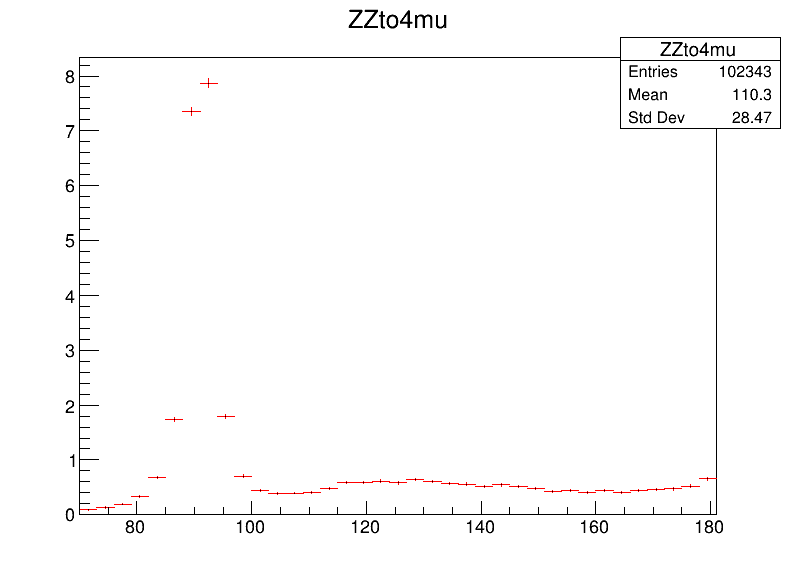

In [10]:
#selecting the 4u events
for i in range(0,nEntries):
    t.GetEntry(i)
    Leptons = list()
    totCharge = 0
    #filtering the good muons    
    nGoodMuon = 0    
    for j in range(0,t.nMuon):
        #relative isolation
        Mrellso = t.Muon_pfRelIso04_all[j]
        if abs(Mrellso) >= 0.4: continue
        #transverse momentum 
        Mpt = t.Muon_pt[j]
        if Mpt <= 5: continue
        #pseudorapidity
        Meta = t.Muon_eta[j]
        if abs(Meta) >= 2.4: continue
        #Transverse impact parameter
        Mdxy = t.Muon_dxy[j]
        if abs(Mdxy) >= 0.5: continue
        #Longitudinal impact parameter
        Mdz = t.Muon_dz[j]
        if abs(Mdz) >= 1: continue
        #3D impact significance
        Msip = np.sqrt((Mdxy**2+Mdz**2)/(t.Muon_dxyErr[j]**2+t.Muon_dzErr[j]**2))
        if Msip >= 4: continue
        nGoodMuon += 1
        totCharge += t.Muon_charge[j]
        lepton = {
            'pt' : Mpt,
            'phi' : t.Muon_phi[j],
            'eta' : Meta,
            'mass' : t.Muon_mass[j],
            'charge' : t.Muon_charge[j],
        }
        Leptons.append(lepton)
    if nGoodMuon != 4: continue 
    if totCharge != 0: continue  
    Leptons = sorted(Leptons, key = lambda j:j['charge'], reverse =True)
    if (not check(Leptons)): continue
    h_ZZto4mu.Fill(invmass(Leptons),weight)  
c.Update()
c.Draw()

In [11]:
outf = r.TFile.Open('simu_histograms.root','RECREATE')
outf.cd()
h_ZZto4mu.Write()

1141

In [12]:
f = r.TFile("samples/ZZTo4e_skim_v2.root")
f.ls()
t = f.Get("Events")
nEntries = t.GetEntries()
print(nEntries)

117621
TFile**		samples/ZZTo4e_skim_v2.root	
 TFile*		samples/ZZTo4e_skim_v2.root	
  KEY: TTree	Events;2	Events
  KEY: TTree	Events;1	Events


In [13]:
#Creating a histogram
h_ZZto4e = r.TH1F('ZZto4e','ZZto4e',37,70,181)
h_ZZto4e.SetFillColor(0)
h_ZZto4e.SetLineColor(r.kGreen)
h_ZZto4e.Sumw2()
h_ZZto4e.Draw()
c.Update()

In [14]:
xsec = 7.7241300E-02*1.386
nEvents = 1499093
weight = lumi * xsec / nEvents
print(weight)

0.000819834361086


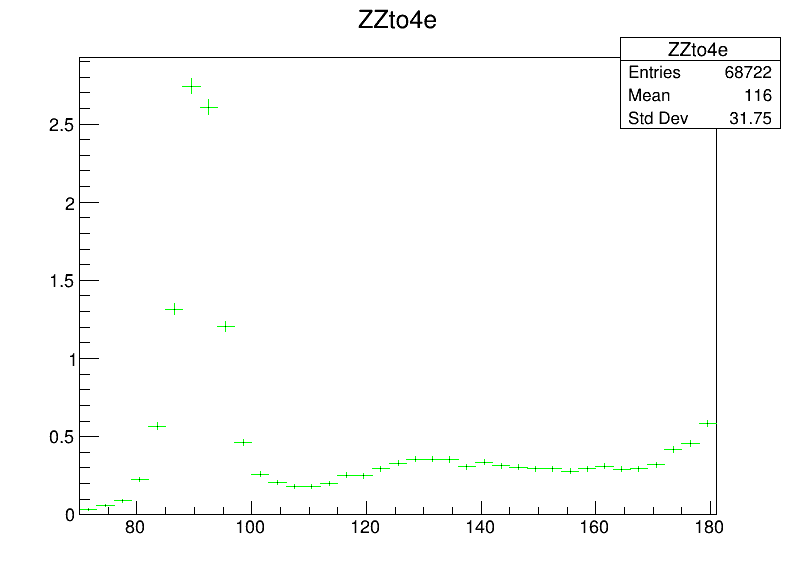

In [15]:
#selecting the 4e events
for i in range(0,nEntries):
    t.GetEntry(i)
    Leptons = list()
    totCharge = 0
    #filtering the good electrons
    nGoodElectron = 0
    for j in range(0,t.nElectron):
        #relative isolation
        Erellso = t.Electron_pfRelIso03_all[j]
        if abs(Erellso) >= 0.4: continue
        #transverse momentum 
        Ept = t.Electron_pt[j]
        if Ept <= 7: continue
        #pseudorapidity
        Eeta = t.Electron_eta[j]
        if abs(Eeta) >= 2.5: continue
        #Transverse impact parameter
        Edxy = t.Electron_dxy[j]
        if abs(Edxy) >= 0.5: continue
        #Longitudinal impact parameter
        Edz = t.Electron_dz[j]
        if abs(Edz) >= 1: continue
        #3D impact significance
        Esip = np.sqrt((Edxy**2+Edz**2)/(t.Electron_dxyErr[j]**2+t.Electron_dzErr[j]**2))
        if Esip >= 4: continue
        nGoodElectron += 1
        totCharge += t.Electron_charge[j]
        lepton = {
            'pt' : Ept,
            'phi' : t.Electron_phi[j],
            'eta' : Eeta,
            'mass' : t.Electron_mass[j],
            'charge' : t.Electron_charge[j],
        }
        Leptons.append(lepton)   
    if nGoodElectron != 4: continue
    if totCharge != 0: continue  
    Leptons = sorted(Leptons, key = lambda j:j['charge'], reverse =True)
    if (not check(Leptons)): continue
    h_ZZto4e.Fill(invmass(Leptons),weight)  
c.Update()
c.Draw()

In [16]:
outf.cd()
h_ZZto4e.Write()

1111

In [17]:
f = r.TFile("samples/ZZTo2e2mu_skim_v2.root")
f.ls()
t = f.Get("Events")
nEntries = t.GetEntries()
print(nEntries)

111075
TFile**		samples/ZZTo2e2mu_skim_v2.root	
 TFile*		samples/ZZTo2e2mu_skim_v2.root	
  KEY: TTree	Events;2	Events
  KEY: TTree	Events;1	Events


In [18]:
#Creating a histogram
h_ZZto2e2mu = r.TH1F('ZZto2e2mu','ZZto2e2mu',37,70,181)
h_ZZto2e2mu.SetFillColor(0)
h_ZZto2e2mu.SetLineColor(r.kMagenta)
h_ZZto2e2mu.Sumw2()
h_ZZto2e2mu.Draw()
c.Update()

In [19]:
xsec = 1.7656500E-01*1.386
nEvents = 1497445
print(lumi)
weight = lumi * xsec / nEvents
print(weight)

11480.0
0.00187611241361


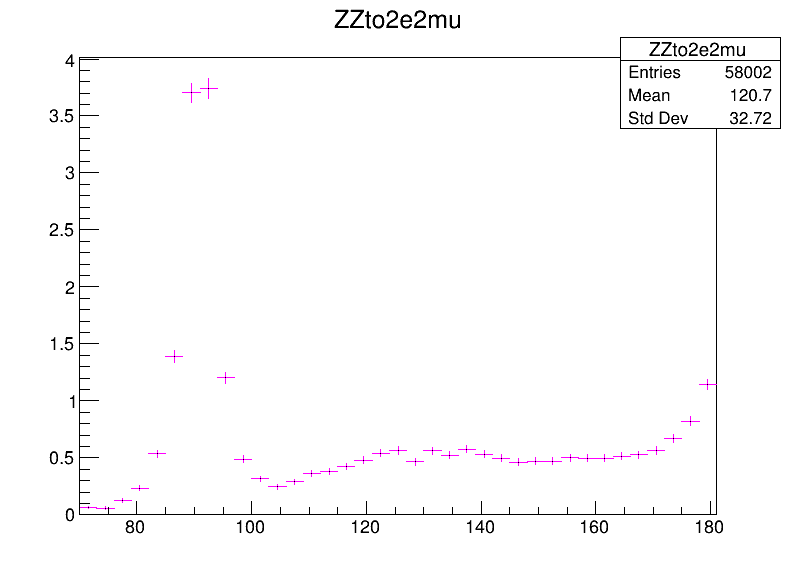

In [20]:
#selecting the 2e2u events
for i in range(0,nEntries):
    t.GetEntry(i)
    nGoodElectron = 0
    Leptons = list()
    totCharge = 0
    #filtering the good electrons
    for j in range(0,t.nElectron):
        #relative isolation
        Erellso = t.Electron_pfRelIso03_all[j]
        if abs(Erellso) >= 0.4: continue
        #transverse momentum 
        Ept = t.Electron_pt[j]
        if Ept <= 7: continue
        #pseudorapidity
        Eeta = t.Electron_eta[j]
        if abs(Eeta) >= 2.5: continue
        #Transverse impact parameter
        Edxy = t.Electron_dxy[j]
        if abs(Edxy) >= 0.5: continue
        #Longitudinal impact parameter
        Edz = t.Electron_dz[j]
        if abs(Edz) >= 1: continue
        #3D impact significance
        Esip = np.sqrt((Edxy**2+Edz**2)/(t.Electron_dxyErr[j]**2+t.Electron_dzErr[j]**2))
        if Esip >= 4: continue
        nGoodElectron += 1
        totCharge += t.Electron_charge[j]
        lepton = {
            'pt' : Ept,
            'phi' : t.Electron_phi[j],
            'eta' : Eeta,
            'mass' : t.Electron_mass[j],
            'charge' : t.Electron_charge[j],
        }
        Leptons.append(lepton)       
    if nGoodElectron != 2: continue
    #2 electrons have the opposite charge    
    if totCharge != 0: continue    
    Zmass1 = invmass(Leptons)
    Lpt1 = max(Leptons[0]['pt'],Leptons[1]['pt'])
    Lpt2 = min(Leptons[0]['pt'],Leptons[1]['pt'])
    #if (Lpt1<=20)or(Lpt2<=10): continue    
    #filtering the good muons    
    nGoodMuon = 0    
    for j in range(0,t.nMuon):
        #relative isolation
        Mrellso = t.Muon_pfRelIso04_all[j]
        if Mrellso >= 0.4: continue
        #transverse momentum 
        Mpt = t.Muon_pt[j]
        if Mpt <= 5: continue
        #pseudorapidity
        Meta = t.Muon_eta[j]
        if abs(Meta) >= 2.4: continue
        #Transverse impact parameter
        Mdxy = t.Muon_dxy[j]
        if abs(Mdxy) >= 0.5: continue
        #Longitudinal impact parameter
        Mdz = t.Muon_dz[j]
        if abs(Mdz) >= 1: continue
        #3D impact significance
        Msip = np.sqrt((Mdxy / t.Muon_dxyErr[j]) ** 2 + (Mdz / t.Muon_dzErr[j]) ** 2)
        if Msip >= 4: continue
        nGoodMuon += 1
        totCharge += t.Muon_charge[j]
        lepton = {
            'pt' : Mpt,
            'phi' : t.Muon_phi[j],
            'eta' : Meta,
            'mass' : t.Muon_mass[j],
            'charge' : t.Muon_charge[j],
        }
        Leptons.append(lepton)    
    if nGoodElectron + nGoodMuon != 4: continue 
    #2 muons have the opposite charge     
    if totCharge != 0: continue  
    Lpt1 = max(Leptons[2]['pt'],Leptons[3]['pt'])
    Lpt2 = min(Leptons[2]['pt'],Leptons[3]['pt'])
    Zmass2 = invmass(Leptons[2:])  
    if (compare(Zmass1,Zmass2)):
        x = Zmass1
        Zmass1 = Zmass2
        Zmass2 = x
    #if (Lpt1<=20)or(Lpt2<=10): continue    
    if (Zmass1<40)or(Zmass1>120): continue
    if (Zmass2<12)or(Zmass2>120): continue    
    h_ZZto2e2mu.Fill(invmass(Leptons),weight)
c.Update()
c.Draw()

In [21]:
outf.cd()
h_ZZto2e2mu.Write()

1135

In [22]:
f = r.TFile("samples/DYJetsToLL_skim_v2.root")
f.ls()
t = f.Get("Events")
nEntries = t.GetEntries()
print(nEntries)

628
TFile**		samples/DYJetsToLL_skim_v2.root	
 TFile*		samples/DYJetsToLL_skim_v2.root	
  KEY: TTree	Events;2	Events
  KEY: TTree	Events;1	Events


In [23]:
#Creating a histogram
h_DYJets = r.TH1F('DYJets','DYJets',37,70,181)
h_DYJets.SetFillColor(0)
h_DYJets.SetLineColor(r.kOrange)
h_DYJets.Sumw2()
h_DYJets.Draw()
c.Update()

In [24]:
xsec = 2.7903452E+03
nEvents = 30458871
print(lumi)
weight = lumi * xsec / nEvents
print(weight)

11480.0
1.05168582565


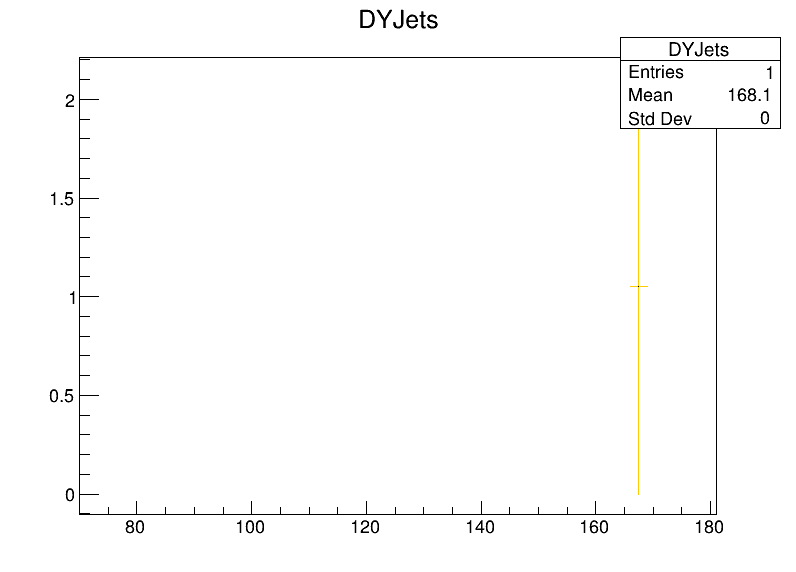

In [25]:
#selecting the 4u events
for i in range(0,nEntries):
    t.GetEntry(i)
    Leptons = list()
    totCharge = 0
    #filtering the good muons    
    nGoodMuon = 0    
    for j in range(0,t.nMuon):
        #relative isolation
        Mrellso = t.Muon_pfRelIso04_all[j]
        if abs(Mrellso) >= 0.4: continue
        #transverse momentum 
        Mpt = t.Muon_pt[j]
        if Mpt <= 5: continue
        #pseudorapidity
        Meta = t.Muon_eta[j]
        if abs(Meta) >= 2.4: continue
        #Transverse impact parameter
        Mdxy = t.Muon_dxy[j]
        if abs(Mdxy) >= 0.5: continue
        #Longitudinal impact parameter
        Mdz = t.Muon_dz[j]
        if abs(Mdz) >= 1: continue
        #3D impact significance
        Msip = np.sqrt((Mdxy**2+Mdz**2)/(t.Muon_dxyErr[j]**2+t.Muon_dzErr[j]**2))
        if Msip >= 4: continue
        nGoodMuon += 1
        totCharge += t.Muon_charge[j]
        lepton = {
            'pt' : Mpt,
            'phi' : t.Muon_phi[j],
            'eta' : Meta,
            'mass' : t.Muon_mass[j],
            'charge' : t.Muon_charge[j],
        }
        Leptons.append(lepton)
    if nGoodMuon != 4: continue 
    if totCharge != 0: continue  
    Leptons = sorted(Leptons, key = lambda j:j['charge'], reverse =True)
    if (not check(Leptons)): continue
    h_DYJets.Fill(invmass(Leptons),weight)  
c.Update()
c.Draw()

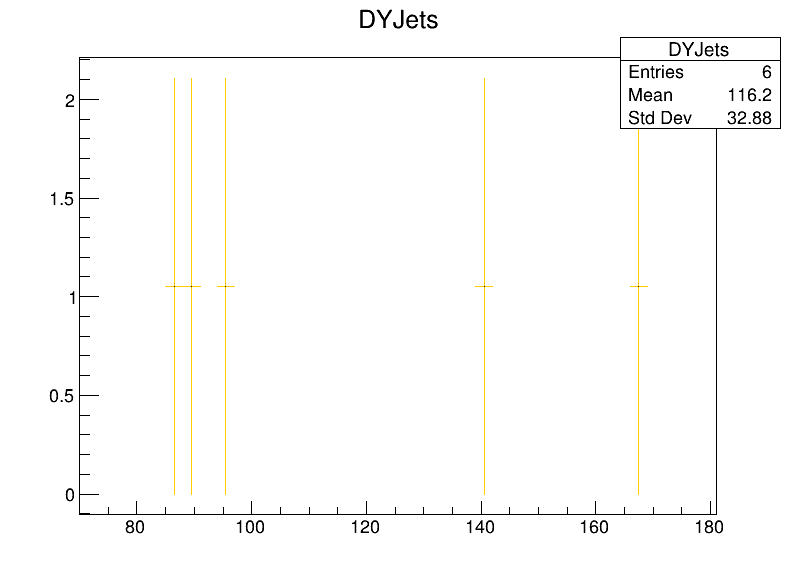

In [26]:
#selecting the 4e events
for i in range(0,nEntries):
    t.GetEntry(i)
    Leptons = list()
    totCharge = 0
    #filtering the good electrons
    nGoodElectron = 0
    for j in range(0,t.nElectron):
        #relative isolation
        Erellso = t.Electron_pfRelIso03_all[j]
        if abs(Erellso) >= 0.4: continue
        #transverse momentum 
        Ept = t.Electron_pt[j]
        if Ept <= 7: continue
        #pseudorapidity
        Eeta = t.Electron_eta[j]
        if abs(Eeta) >= 2.5: continue
        #Transverse impact parameter
        Edxy = t.Electron_dxy[j]
        if abs(Edxy) >= 0.5: continue
        #Longitudinal impact parameter
        Edz = t.Electron_dz[j]
        if abs(Edz) >= 1: continue
        #3D impact significance
        Esip = np.sqrt((Edxy**2+Edz**2)/(t.Electron_dxyErr[j]**2+t.Electron_dzErr[j]**2))
        if Esip >= 4: continue
        nGoodElectron += 1
        totCharge += t.Electron_charge[j]
        lepton = {
            'pt' : Ept,
            'phi' : t.Electron_phi[j],
            'eta' : Eeta,
            'mass' : t.Electron_mass[j],
            'charge' : t.Electron_charge[j],
        }
        Leptons.append(lepton)   
    if nGoodElectron != 4: continue
    if totCharge != 0: continue  
    Leptons = sorted(Leptons, key = lambda j:j['charge'], reverse =True)
    if (not check(Leptons)): continue
    h_DYJets.Fill(invmass(Leptons),weight)  
c.Update()
c.Draw()

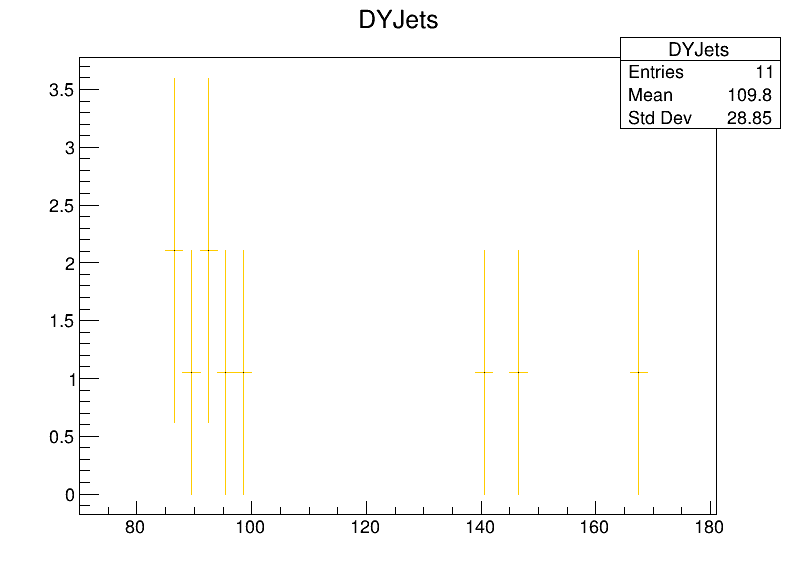

In [27]:
#selecting the 2e2u events
for i in range(0,nEntries):
    t.GetEntry(i)
    nGoodElectron = 0
    Leptons = list()
    totCharge = 0
    #filtering the good electrons
    for j in range(0,t.nElectron):
        #relative isolation
        Erellso = t.Electron_pfRelIso03_all[j]
        if abs(Erellso) >= 0.4: continue
        #transverse momentum 
        Ept = t.Electron_pt[j]
        if Ept <= 7: continue
        #pseudorapidity
        Eeta = t.Electron_eta[j]
        if abs(Eeta) >= 2.5: continue
        #Transverse impact parameter
        Edxy = t.Electron_dxy[j]
        if abs(Edxy) >= 0.5: continue
        #Longitudinal impact parameter
        Edz = t.Electron_dz[j]
        if abs(Edz) >= 1: continue
        #3D impact significance
        Esip = np.sqrt((Edxy**2+Edz**2)/(t.Electron_dxyErr[j]**2+t.Electron_dzErr[j]**2))
        if Esip >= 4: continue
        nGoodElectron += 1
        totCharge += t.Electron_charge[j]
        lepton = {
            'pt' : Ept,
            'phi' : t.Electron_phi[j],
            'eta' : Eeta,
            'mass' : t.Electron_mass[j],
            'charge' : t.Electron_charge[j],
        }
        Leptons.append(lepton)       
    if nGoodElectron != 2: continue
    #2 electrons have the opposite charge    
    if totCharge != 0: continue    
    Zmass1 = invmass(Leptons)
    Lpt1 = max(Leptons[0]['pt'],Leptons[1]['pt'])
    Lpt2 = min(Leptons[0]['pt'],Leptons[1]['pt'])
    #if (Lpt1<=20)or(Lpt2<=10): continue    
    #filtering the good muons    
    nGoodMuon = 0    
    for j in range(0,t.nMuon):
        #relative isolation
        Mrellso = t.Muon_pfRelIso04_all[j]
        if abs(Mrellso) >= 0.4: continue
        #transverse momentum 
        Mpt = t.Muon_pt[j]
        if Mpt <= 5: continue
        #pseudorapidity
        Meta = t.Muon_eta[j]
        if abs(Meta) >= 2.4: continue
        #Transverse impact parameter
        Mdxy = t.Muon_dxy[j]
        if abs(Mdxy) >= 0.5: continue
        #Longitudinal impact parameter
        Mdz = t.Muon_dz[j]
        if abs(Mdz) >= 1: continue
        #3D impact significance
        Msip = np.sqrt((Mdxy**2+Mdz**2)/(t.Muon_dxyErr[j]**2+t.Muon_dzErr[j]**2))
        if Msip >= 4: continue
        nGoodMuon += 1
        totCharge += t.Muon_charge[j]
        lepton = {
            'pt' : Mpt,
            'phi' : t.Muon_phi[j],
            'eta' : Meta,
            'mass' : t.Muon_mass[j],
            'charge' : t.Muon_charge[j],
        }
        Leptons.append(lepton)    
    if nGoodElectron + nGoodMuon != 4: continue 
    #2 muons have the opposite charge     
    if totCharge != 0: continue  
    Zmass2 = invmass(Leptons[2:]) 
    Lpt1 = max(Leptons[2]['pt'],Leptons[3]['pt'])
    Lpt2 = min(Leptons[2]['pt'],Leptons[3]['pt'])
    if (compare(Zmass1,Zmass2)):
        x = Zmass1
        Zmass1 = Zmass2
        Zmass2 = x
    #if (Lpt1<=20)or(Lpt2<=10): continue    
    if (Zmass1<40)or(Zmass1>120): continue
    if (Zmass2<12)or(Zmass2>120): continue    
    h_DYJets.Fill(invmass(Leptons),weight)
c.Update()
c.Draw()

In [28]:
outf.cd()
h_DYJets.Write()

727

In [29]:
f = r.TFile("samples/SMHiggsToZZTo4L_skim_v2.root")
f.ls()
t = f.Get("Events")
nEntries = t.GetEntries()
print(nEntries)

39807
TFile**		samples/SMHiggsToZZTo4L_skim_v2.root	
 TFile*		samples/SMHiggsToZZTo4L_skim_v2.root	
  KEY: TTree	Events;2	Events
  KEY: TTree	Events;1	Events


In [30]:
#Creating a histogram
h_Higgs = r.TH1F('Higgs','Higgs',37,70,181)
h_Higgs.SetFillColor(0)
h_Higgs.SetLineColor(r.kBlack)
h_Higgs.Sumw2()
h_Higgs.Draw()
c.Update()

In [31]:
xsec = 0.0065
nEvents = 299973
print(lumi)
weight = lumi * xsec / nEvents
print(weight)

11480.0
0.000248755721348


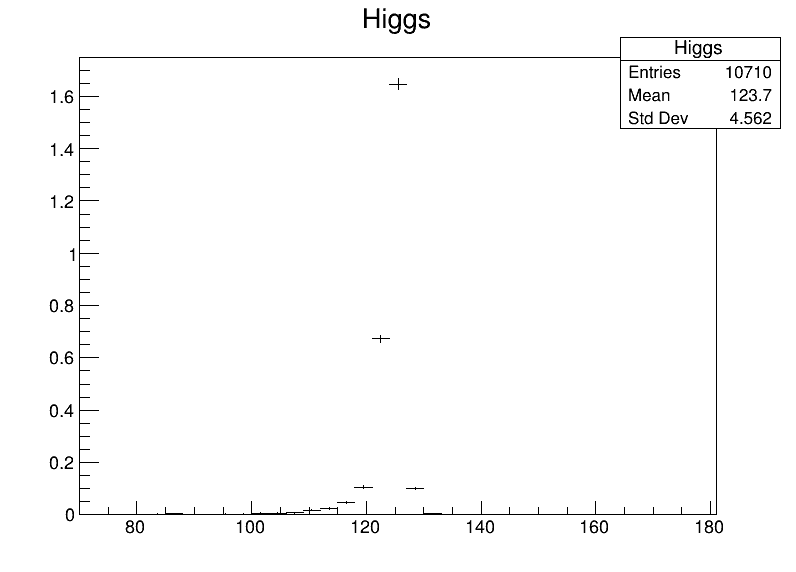

In [32]:
#selecting the 4u events
for i in range(0,nEntries):
    t.GetEntry(i)
    Leptons = list()
    totCharge = 0
    #filtering the good muons    
    nGoodMuon = 0    
    for j in range(0,t.nMuon):
        #relative isolation
        Mrellso = t.Muon_pfRelIso04_all[j]
        if abs(Mrellso) >= 0.4: continue
        #transverse momentum 
        Mpt = t.Muon_pt[j]
        if Mpt <= 5: continue
        #pseudorapidity
        Meta = t.Muon_eta[j]
        if abs(Meta) >= 2.4: continue
        #Transverse impact parameter
        Mdxy = t.Muon_dxy[j]
        if abs(Mdxy) >= 0.5: continue
        #Longitudinal impact parameter
        Mdz = t.Muon_dz[j]
        if abs(Mdz) >= 1: continue
        #3D impact significance
        Msip = np.sqrt((Mdxy**2+Mdz**2)/(t.Muon_dxyErr[j]**2+t.Muon_dzErr[j]**2))
        if Msip >= 4: continue
        nGoodMuon += 1
        totCharge += t.Muon_charge[j]
        lepton = {
            'pt' : Mpt,
            'phi' : t.Muon_phi[j],
            'eta' : Meta,
            'mass' : t.Muon_mass[j],
            'charge' : t.Muon_charge[j],
        }
        Leptons.append(lepton)
    if nGoodMuon != 4: continue 
    if totCharge != 0: continue  
    Leptons = sorted(Leptons, key = lambda j:j['charge'], reverse =True)
    if (not check(Leptons)): continue
    h_Higgs.Fill(invmass(Leptons),weight)  
c.Update()
c.Draw()

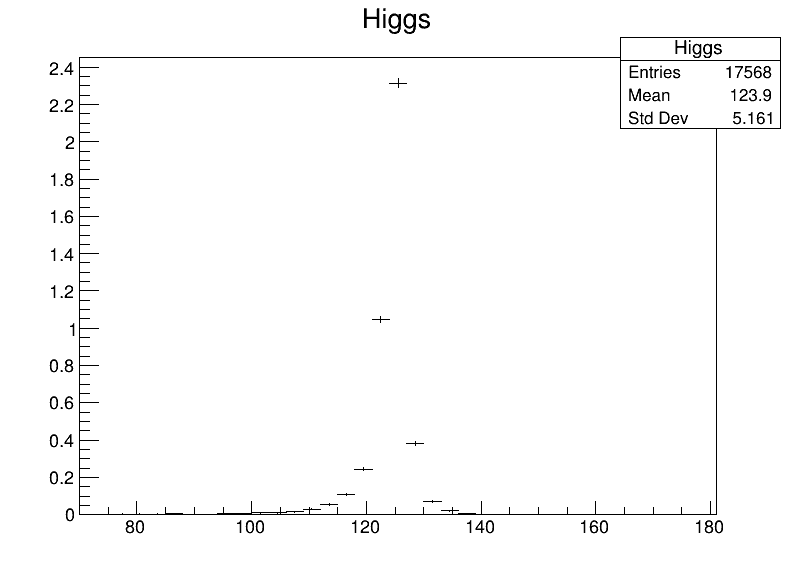

In [33]:
#selecting the 4e events
for i in range(0,nEntries):
    t.GetEntry(i)
    Leptons = list()
    totCharge = 0
    #filtering the good electrons
    nGoodElectron = 0
    for j in range(0,t.nElectron):
        #relative isolation
        Erellso = t.Electron_pfRelIso03_all[j]
        if abs(Erellso) >= 0.4: continue
        #transverse momentum 
        Ept = t.Electron_pt[j]
        if Ept <= 7: continue
        #pseudorapidity
        Eeta = t.Electron_eta[j]
        if abs(Eeta) >= 2.5: continue
        #Transverse impact parameter
        Edxy = t.Electron_dxy[j]
        if abs(Edxy) >= 0.5: continue
        #Longitudinal impact parameter
        Edz = t.Electron_dz[j]
        if abs(Edz) >= 1: continue
        #3D impact significance
        Esip = np.sqrt((Edxy**2+Edz**2)/(t.Electron_dxyErr[j]**2+t.Electron_dzErr[j]**2))
        if Esip >= 4: continue
        nGoodElectron += 1
        totCharge += t.Electron_charge[j]
        lepton = {
            'pt' : Ept,
            'phi' : t.Electron_phi[j],
            'eta' : Eeta,
            'mass' : t.Electron_mass[j],
            'charge' : t.Electron_charge[j],
        }
        Leptons.append(lepton)   
    if nGoodElectron != 4: continue
    if totCharge != 0: continue  
    Leptons = sorted(Leptons, key = lambda j:j['charge'], reverse =True)
    if (not check(Leptons)): continue
    h_Higgs.Fill(invmass(Leptons),weight)  
c.Update()
c.Draw()

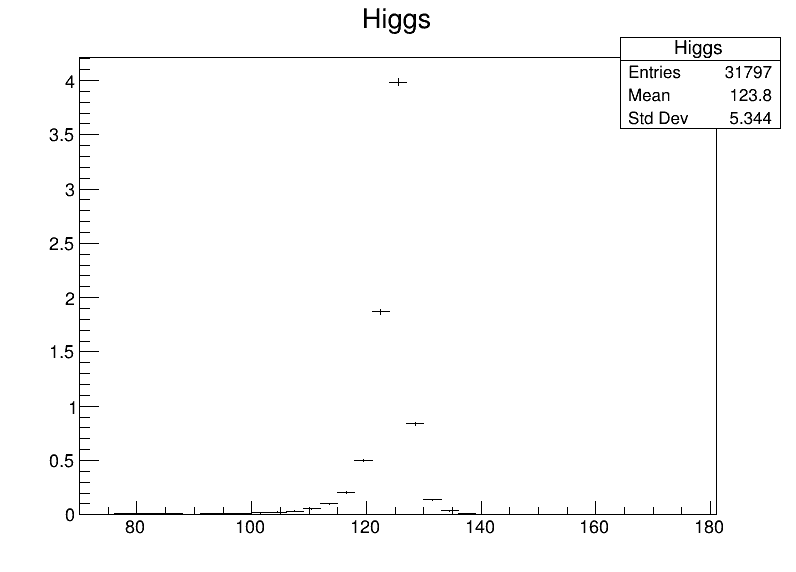

In [34]:
#selecting the 2e2u events
for i in range(0,nEntries):
    t.GetEntry(i)
    nGoodElectron = 0
    Leptons = list()
    totCharge = 0
    #filtering the good electrons
    for j in range(0,t.nElectron):
        #relative isolation
        Erellso = t.Electron_pfRelIso03_all[j]
        if abs(Erellso) >= 0.4: continue
        #transverse momentum 
        Ept = t.Electron_pt[j]
        if Ept <= 7: continue
        #pseudorapidity
        Eeta = t.Electron_eta[j]
        if abs(Eeta) >= 2.5: continue
        #Transverse impact parameter
        Edxy = t.Electron_dxy[j]
        if abs(Edxy) >= 0.5: continue
        #Longitudinal impact parameter
        Edz = t.Electron_dz[j]
        if abs(Edz) >= 1: continue
        #3D impact significance
        Esip = np.sqrt((Edxy**2+Edz**2)/(t.Electron_dxyErr[j]**2+t.Electron_dzErr[j]**2))
        if Esip >= 4: continue
        nGoodElectron += 1
        totCharge += t.Electron_charge[j]
        lepton = {
            'pt' : Ept,
            'phi' : t.Electron_phi[j],
            'eta' : Eeta,
            'mass' : t.Electron_mass[j],
            'charge' : t.Electron_charge[j],
        }
        Leptons.append(lepton)       
    if nGoodElectron != 2: continue
    #2 electrons have the opposite charge    
    if totCharge != 0: continue    
    Zmass1 = invmass(Leptons)
    Lpt1 = max(Leptons[0]['pt'],Leptons[1]['pt'])
    Lpt2 = min(Leptons[0]['pt'],Leptons[1]['pt'])
    #if (Lpt1<=20)or(Lpt2<=10): continue        
    #filtering the good muons    
    nGoodMuon = 0    
    for j in range(0,t.nMuon):
        #relative isolation
        Mrellso = t.Muon_pfRelIso04_all[j]
        if abs(Mrellso) >= 0.4: continue
        #transverse momentum 
        Mpt = t.Muon_pt[j]
        if Mpt <= 5: continue
        #pseudorapidity
        Meta = t.Muon_eta[j]
        if abs(Meta) >= 2.4: continue
        #Transverse impact parameter
        Mdxy = t.Muon_dxy[j]
        if abs(Mdxy) >= 0.5: continue
        #Longitudinal impact parameter
        Mdz = t.Muon_dz[j]
        if abs(Mdz) >= 1: continue
        #3D impact significance
        Msip = np.sqrt((Mdxy**2+Mdz**2)/(t.Muon_dxyErr[j]**2+t.Muon_dzErr[j]**2))
        if Msip >= 4: continue
        nGoodMuon += 1
        totCharge += t.Muon_charge[j]
        lepton = {
            'pt' : Mpt,
            'phi' : t.Muon_phi[j],
            'eta' : Meta,
            'mass' : t.Muon_mass[j],
            'charge' : t.Muon_charge[j],
        }
        Leptons.append(lepton)    
    if nGoodElectron + nGoodMuon != 4: continue 
    #2 muons have the opposite charge     
    if totCharge != 0: continue  
    Zmass2 = invmass(Leptons[2:])
    Lpt1 = max(Leptons[2]['pt'],Leptons[3]['pt'])
    Lpt2 = min(Leptons[2]['pt'],Leptons[3]['pt'])
    if (compare(Zmass1,Zmass2)):
        x = Zmass1
        Zmass1 = Zmass2
        Zmass2 = x
    #if (Lpt1<=20)or(Lpt2<=10): continue    
    if (Zmass1<40)or(Zmass1>120): continue
    if (Zmass2<12)or(Zmass2>120): continue    
    h_Higgs.Fill(invmass(Leptons),weight)
c.Update()
c.Draw()

In [35]:
outf.cd()
h_Higgs.Write()
outf.Close()

In [3]:
inf = r.TFile("simu_histograms.root")
inf.ls()

TFile**		simu_histograms.root	
 TFile*		simu_histograms.root	
  KEY: TH1F	ZZto4mu;1	ZZto4mu
  KEY: TH1F	ZZto4e;1	ZZto4e
  KEY: TH1F	ZZto2e2mu;1	ZZto2e2mu
  KEY: TH1F	DYJets;1	DYJets
  KEY: TH1F	Higgs;1	Higgs


In [12]:
SimuTHS = r.THStack()

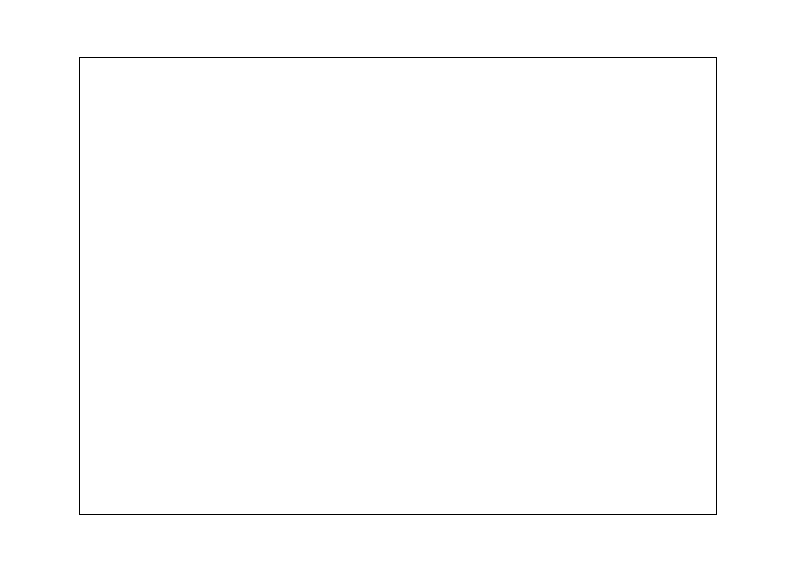

In [44]:
#SimuTHS.Add(inf.Get('DYJets'))
#c.Update()
#c.Draw()

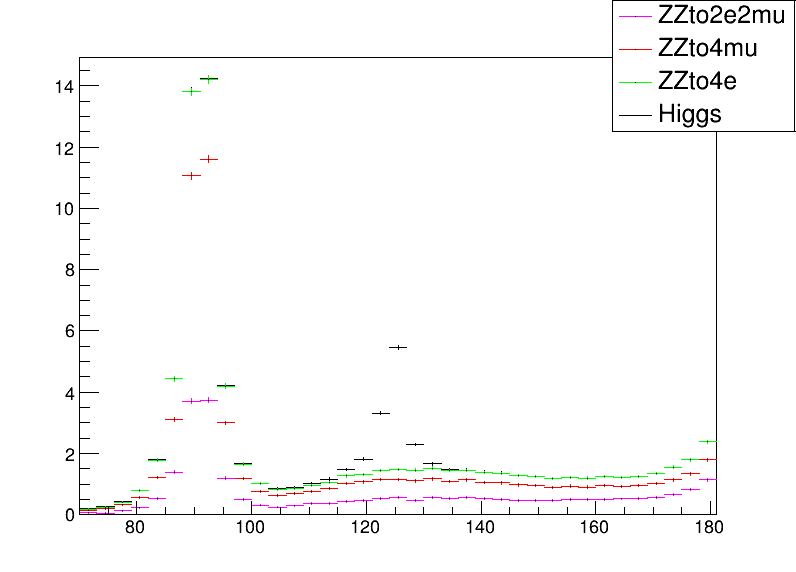

In [13]:
h_ZZto2e2mu = inf.Get('ZZto2e2mu')
leg = r.TLegend(0.77,0.77,1,1)
leg.AddEntry(h_ZZto2e2mu,'ZZto2e2mu')
SimuTHS.Add(h_ZZto2e2mu)
h_ZZto4mu = inf.Get('ZZto4mu')
leg.AddEntry(h_ZZto4mu,'ZZto4mu')
SimuTHS.Add(h_ZZto4mu)
h_ZZto4e = inf.Get('ZZto4e')
leg.AddEntry(h_ZZto4e,'ZZto4e')
SimuTHS.Add(h_ZZto4e)
h_Higgs = inf.Get('Higgs')
leg.AddEntry(h_Higgs,'Higgs')
SimuTHS.Add(h_Higgs)
h_Higgs.GetYaxis().SetTitle('Events/3GeV')
h_Higgs.GetXaxis().SetTitle('M_{4l}[GeV]')
h_Higgs.SetTitle('')
SimuTHS.Draw()
leg.Draw('same')
c.Update()
c.Draw()